### Importing and building the plotting functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [2]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 20)
plt.style.use('fivethirtyeight')
# plt.style.use('seaborn')

In [3]:
def plotter(DF, name, xlabel= 'Date', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.yscale(scale)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF.index,
                 DF[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8# if col in Countries else 0.4
                )
    plt.title(name+' wrt Date in Countries')
    plt.xlabel(xlabel)
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

In [4]:
def plotwrtDeaths(DF2, name1, DF, name2 = 'Deaths', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.xscale(scale)
    plt.yscale(scale)
    
#     plt.ylim(bottom=0.05, top=2*10**4)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF[col],
                 DF2[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(f'{name1} wrt {name2} in Countries')
    plt.xlabel(name2)
    plt.ylabel(name1)
    plt.legend(loc = 2)
    plt.show()

In [5]:
def stackplotter(DF, name, tail=None):
    plt.figure(figsize = (14, 7))
    
    if tail:
        DF = DF.tail(tail)
    columns = Countries[::-1]
    columns = [t for t in columns if 'World' not in t][::-1]
    
    plt.stackplot(DF.index, 
                  DF[['World']].T, 
                  labels=['World'], 
                  colors=['blue'], 
                  alpha=0.2,                 
                 )
    
    plt.stackplot(DF.index, 
                  DF[columns].T, 
                  labels=columns, 
                  colors=[colors[c] for c in columns], 
                  alpha=0.8,                 
                 )
    
    
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

### Importing the Data from Johns Hopkins data

In [6]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
DF = pd.read_csv(data_url)

In [7]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Deaths = DF.copy()

In [8]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
DF = pd.read_csv(data_url)

In [9]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Confirmed = DF.copy()

In [10]:
colors = {'India': 'Blue', 
          'World': 'Blue', 
          'US': 'Black', 
          'Brazil': 'darkgreen', 
          'Mexico': 'Orange', 
#           'India': 'Blue', 
          'UK': 'Purple', 
          'Italy': 'grey', 
          'Russia': 'cyan', 
          'France': 'violet', 
          'Germany': 'lime', 
#           'Spain': 'yellow',
#           'Colombia': 'lightgreen', 
#           'Argentina': 'Teal',
#           'Iran': 'brown', 
          'China': 'red', 
#           'New Zealand': 'lightblue'
         }

Countries = list(colors.keys())

### Deaths

In [11]:
Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,China
2021-05-08,242347,3283031,581516,421316,218928,127863,122694,111097,106438,84789,4846
2021-05-09,246116,3292929,581754,422340,218985,127865,122833,111425,106553,84844,4846
2021-05-10,249992,3303696,582153,423229,219089,127870,123031,111740,106845,85118,4846
2021-05-11,254197,3317325,582837,425540,219323,127890,123282,112063,107096,85385,4846
2021-05-12,258317,3331259,583685,428034,219590,127901,123544,112410,107280,85451,4846


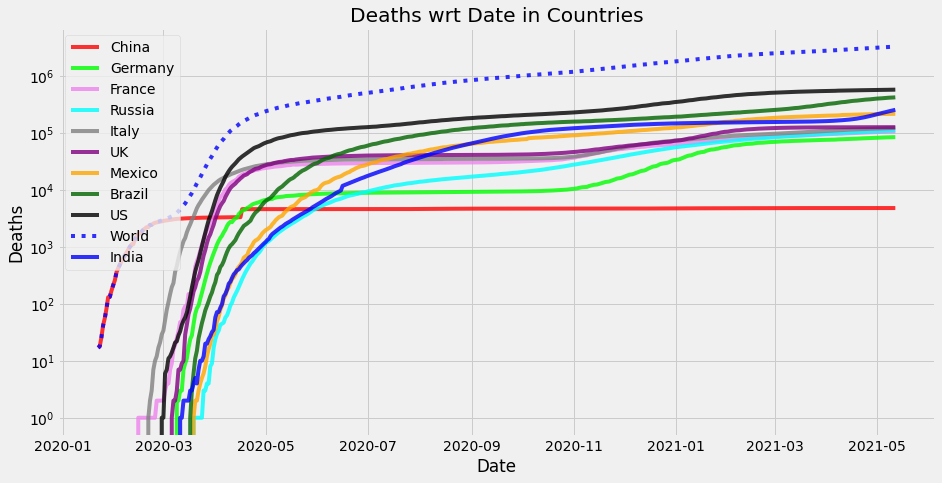

In [12]:
plotter(Deaths, 'Deaths')

### Confirmed Cases

In [13]:
Daily_Confirmed = np.round((Confirmed - Confirmed.shift(1))/1)
Daily_Confirmed = Daily_Confirmed.fillna(0).astype('int')
Daily_Confirmed[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,China
2021-05-08,403405,786546,34493,63430,2743,2056,10174,8198,20745,13125,17
2021-05-09,366494,641539,21392,38911,1175,1770,8289,8290,9128,0,12
2021-05-10,329942,621929,36898,25200,704,2378,5077,8338,3299,7321,18
2021-05-11,348421,738473,33651,72715,1897,2490,6943,7989,19791,19696,17
2021-05-12,362727,760099,35878,76692,3090,2296,7848,8096,21498,6590,11


In [14]:
Confirmed_EWM = np.round(Daily_Confirmed.ewm(com=14).mean().astype(int))
Confirmed_EWM[Countries].tail()

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,China
2021-05-08,315317,772364,52546,63174,3176,2543,12645,8456,25617,17584,19
2021-05-09,318729,763642,50469,61556,3042,2492,12354,8445,24517,16412,19
2021-05-10,319477,754195,49564,59132,2886,2484,11869,8438,23103,15806,19
2021-05-11,321406,753146,48503,60038,2820,2484,11541,8408,22882,16065,19
2021-05-12,324161,753610,47661,61148,2838,2472,11294,8387,22790,15433,18


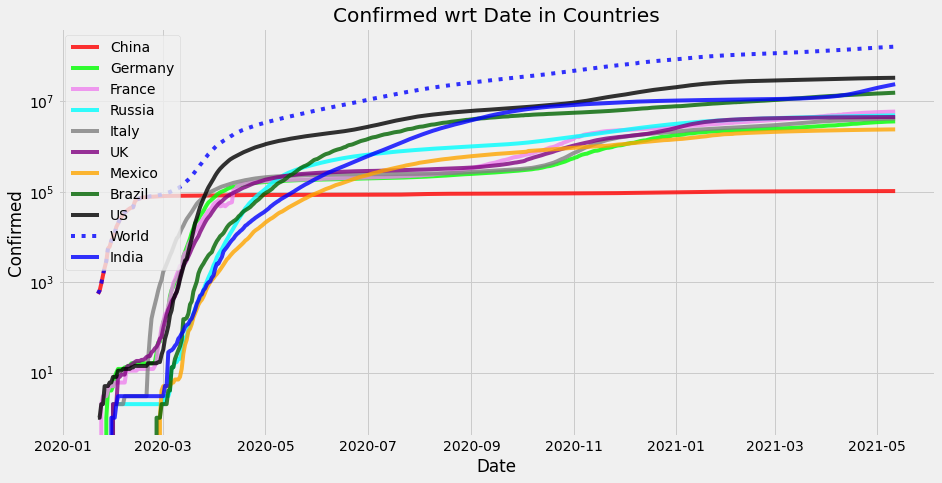

In [15]:
plotter(Confirmed, 'Confirmed')

### Daily Deaths

In [16]:
Daily_Deaths = np.round((Deaths - Deaths.shift(1))/1)
Daily_Deaths = Daily_Deaths.fillna(0).astype('int')
Daily_Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,China
2021-05-08,4077,13175,615,2202,271,5,224,362,176,130,0
2021-05-09,3769,9898,238,1024,57,2,139,328,115,55,0
2021-05-10,3876,10767,399,889,104,5,198,315,292,274,0
2021-05-11,4205,13629,684,2311,234,20,251,323,251,267,0
2021-05-12,4120,13934,848,2494,267,11,262,347,184,66,0


### Exponential Weighted Mean

In [17]:
EWM = np.round(Daily_Deaths.ewm(com=7).mean(), 2)
name = 'Exponential Weighted Mean Weekly'

Weekly_Avg = np.round((Deaths - Deaths.shift(7))/7, 2)
# name = 'Weekly Average Deaths'

AVG = EWM 
# AVG = Weekly_Avg
AVG[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,China
2021-05-08,3444.96,13143.52,700.22,2374.42,318.64,15.47,269.11,358.79,249.13,223.39,0.06
2021-05-09,3485.47,12737.83,642.44,2205.62,285.94,13.78,252.84,354.94,232.36,202.34,0.06
2021-05-10,3534.29,12491.47,612.01,2041.04,263.19,12.69,245.99,349.95,239.82,211.30,0.05
2021-05-11,3618.12,12633.66,621.01,2074.79,259.54,13.60,246.61,346.58,241.22,218.26,0.04
2021-05-12,3680.86,12796.21,649.38,2127.19,260.48,13.28,248.54,346.63,234.06,199.23,0.04


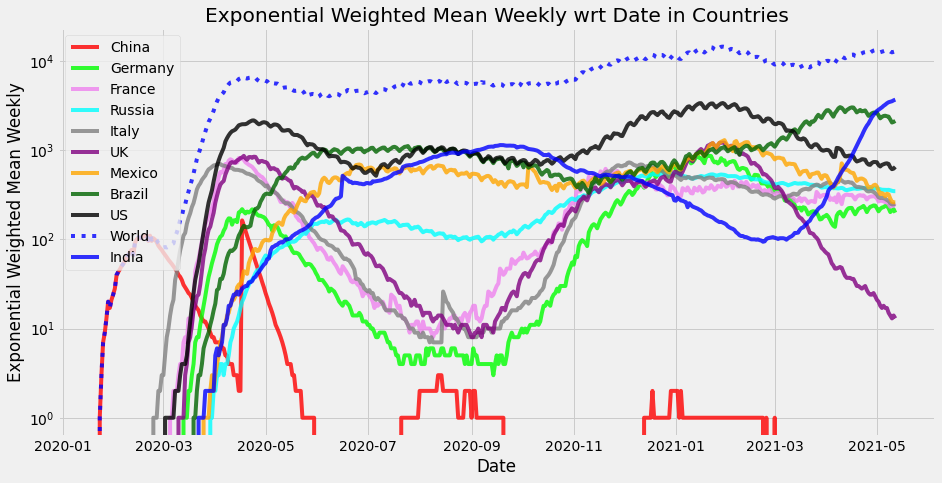

In [18]:
plotter(np.round(AVG), name)

### Stack Plots

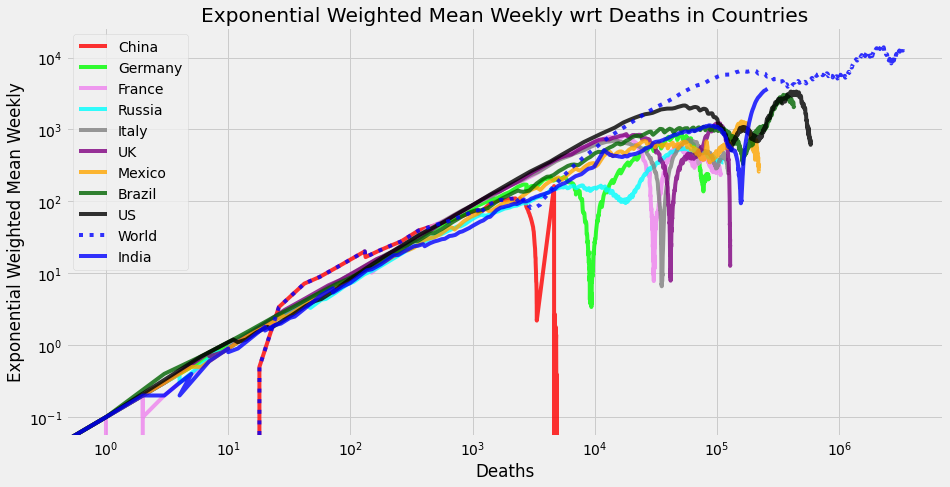

In [19]:
plotwrtDeaths(np.round(AVG, 1), name, Deaths)

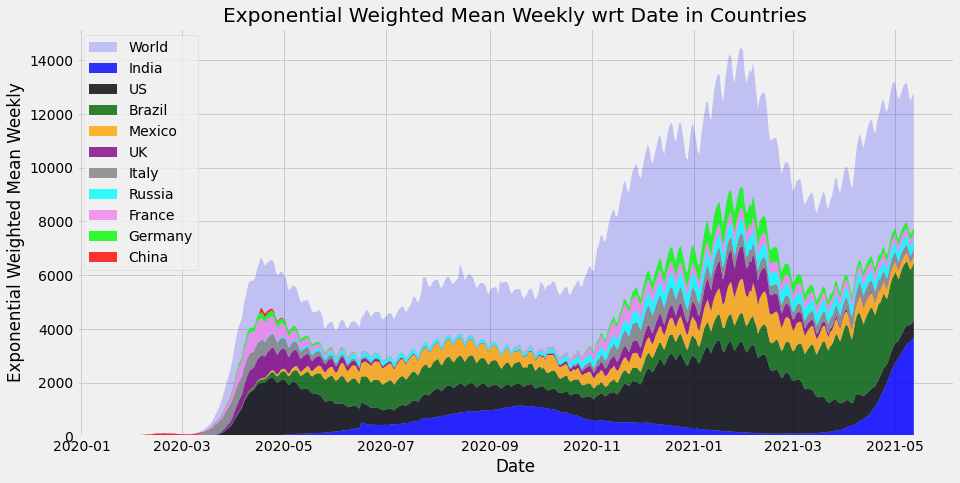

In [20]:
stackplotter(AVG, name)

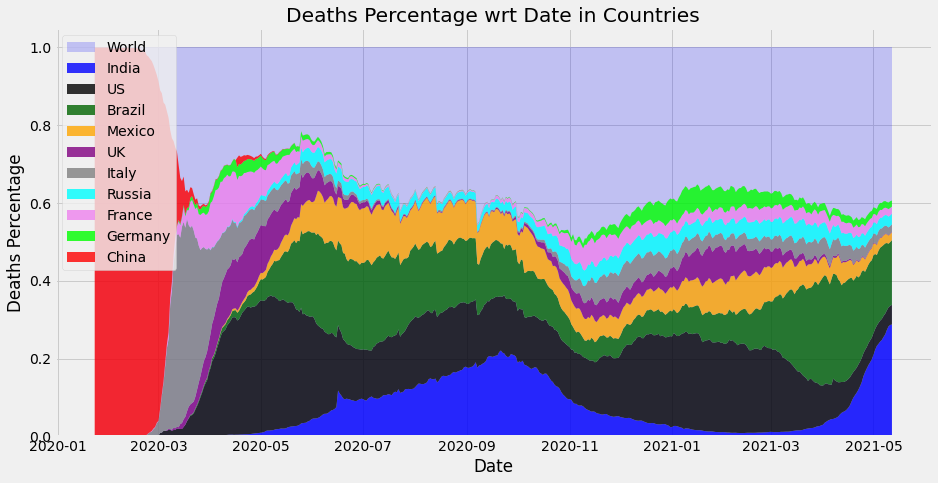

In [21]:
stackplotter(AVG.divide(AVG.World, axis=0), 'Deaths Percentage')

### Reproductivity

In [22]:
Reproductivity = np.round(EWM/EWM.shift(14), 4).clip(lower= 0.1)
Reproductivity[EWM.shift(14) < 12] = 1

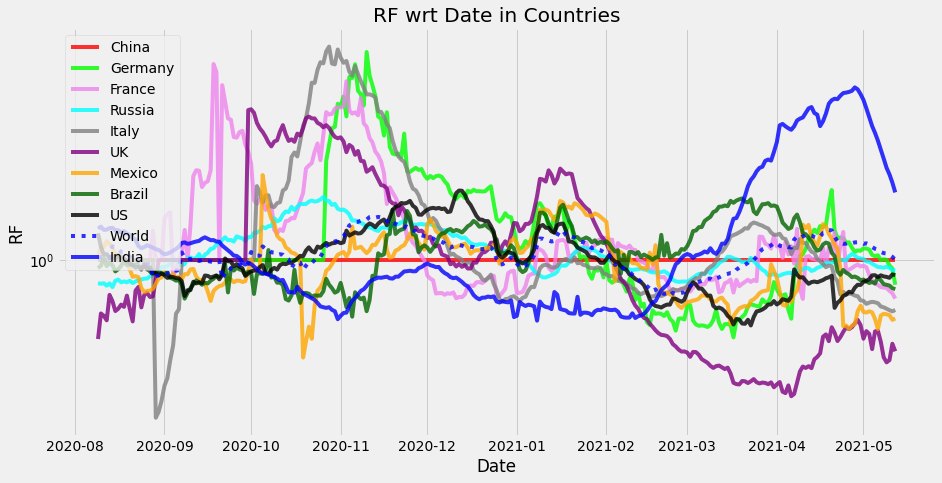

In [23]:
plotter(Reproductivity[200:], 'RF')

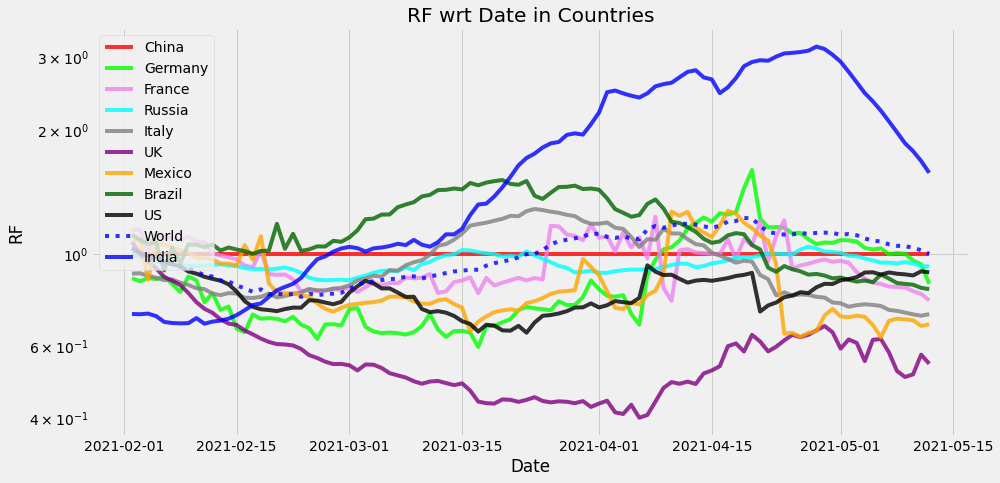

In [24]:
plotter(Reproductivity.tail(100), 'RF')

### Test rate

In [25]:
# We take the mortality to be 0.5%

mortality = 0.005

Testrate = np.round(Confirmed_EWM/(EWM/mortality), 3)
Testrate[EWM < 12] = None

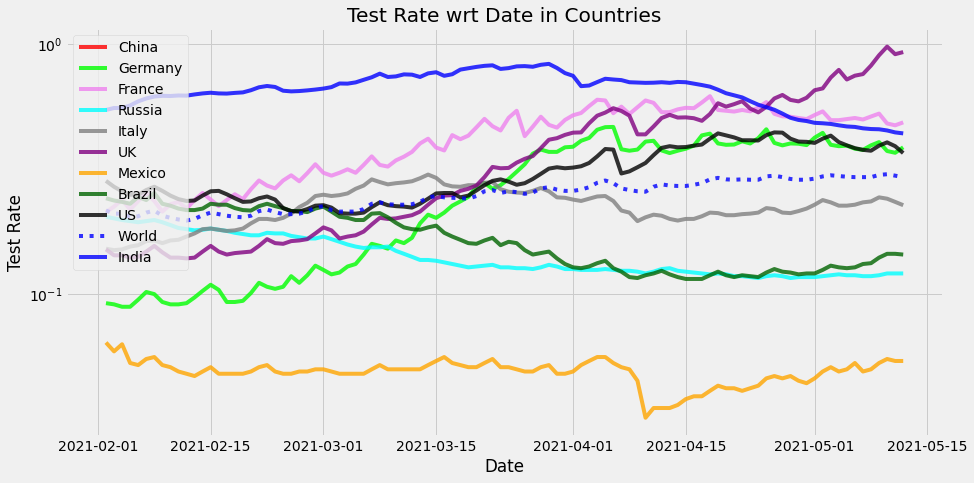

In [26]:
plotter(Testrate.tail(100), 'Test Rate', scale= 'log')

### Time Adjusted for starting day

In [27]:
def adjust_days(DF):
    X = DF.copy()
#     X.reset_index()
    for col in DF.columns:
        L = list(DF[Deaths[col]>5][col])
        X[col] = L + [None for _ in range(len(X[col]) - len(L))]
    return X.reset_index()[DF.columns]
xlabel= 'Days from 5 Deaths'

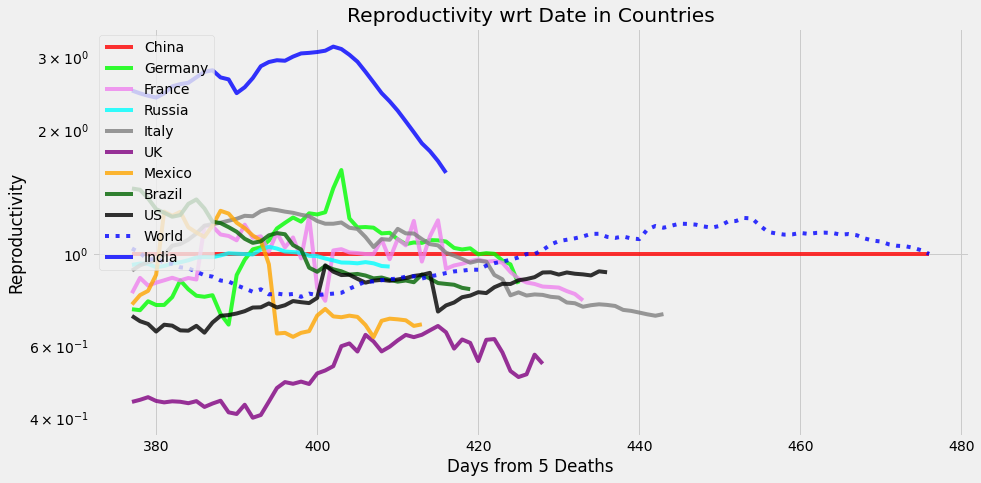

In [28]:
RF_A = adjust_days(Reproductivity)
plotter(RF_A.tail(100), 'Reproductivity', xlabel)

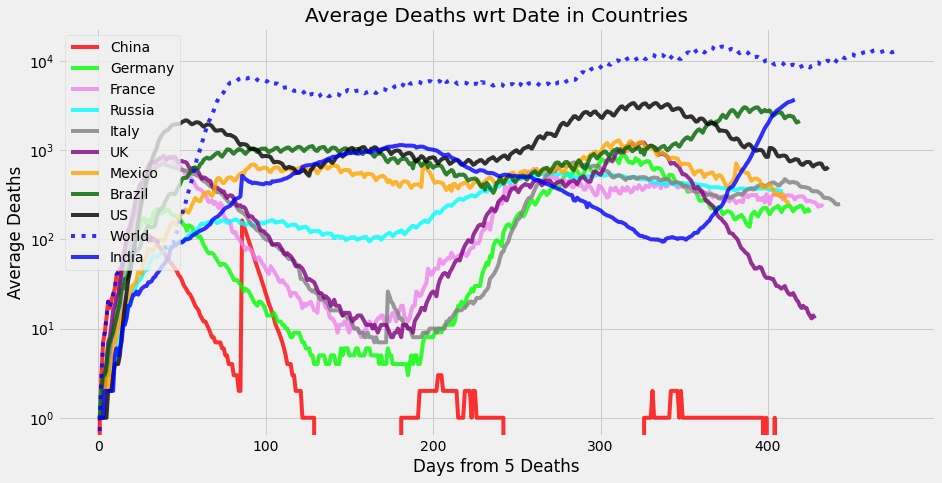

In [29]:
AVG_A = adjust_days(AVG)
plotter(np.round(AVG_A), 'Average Deaths', xlabel)

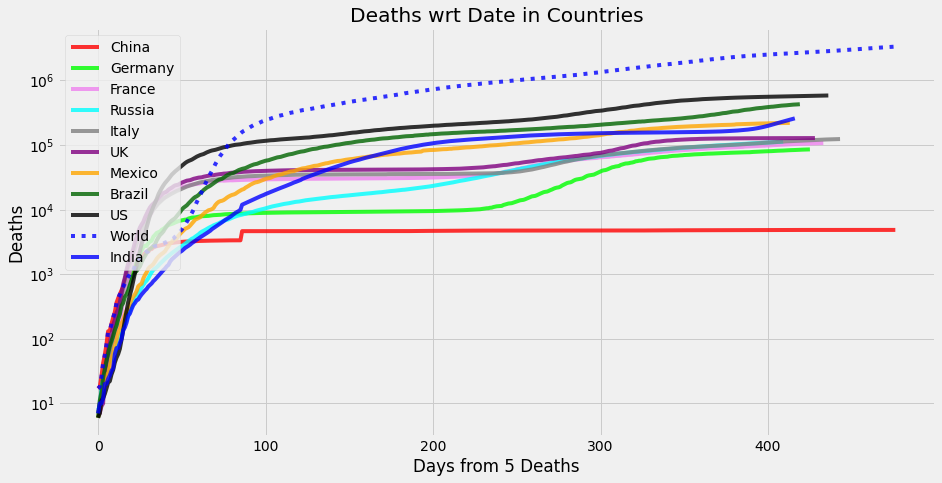

In [30]:
Deaths_A = adjust_days(Deaths)
plotter(Deaths_A, 'Deaths', xlabel)

### Today's Statistics by combining the previous tables

In [31]:
LastDay_DF = pd.DataFrame()
LastDay_DF['Country'] = Deaths.columns
LastDay_DF = LastDay_DF.set_index('Country')

D = {
    'Deaths':Deaths,
    'Daily_Deaths':Daily_Deaths,
    'Weekly_Deaths': Weekly_Avg,
    'EWM7': EWM,
    'Reproductivity':Reproductivity,
    'Confirmed': Confirmed, 
    'Testrate': Testrate,
    'Confirmed_EWM': Confirmed_EWM
    }
for name in D:
    LastDay_DF[name] = D[name].iloc[-1]
LastDay_DF['Estimated(M)'] = np.round((LastDay_DF.Deaths/mortality)/1000000, 2)

In [32]:
LastDay_DF.sort_values('Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,3331259,13934,12768.14,12796.21,1.0009,160450873,0.294,753610,666.25
US,583685,848,618.00,649.38,0.9035,32814784,0.367,47661,116.74
Brazil,428034,2494,1947.86,2127.19,0.8223,15359397,0.144,61148,85.61
India,258317,4120,4021.29,3680.86,1.5726,23703665,0.440,324161,51.66
Mexico,219590,267,226.14,260.48,0.6760,2371483,0.054,2838,43.92
UK,127901,11,10.14,13.28,0.5427,4457742,0.931,2472,25.58
Italy,123544,262,219.86,248.54,0.7157,4131078,0.227,11294,24.71
Russia,112410,347,341.14,346.63,0.9327,4849044,0.121,8387,22.48
France,107280,184,212.57,234.06,0.7724,5882882,0.487,22790,21.46


In [33]:
LastDay_DF.sort_values('Weekly_Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,3331259,13934,12768.14,12796.21,1.0009,160450873,0.294,753610,666.25
India,258317,4120,4021.29,3680.86,1.5726,23703665,0.440,324161,51.66
Brazil,428034,2494,1947.86,2127.19,0.8223,15359397,0.144,61148,85.61
US,583685,848,618.00,649.38,0.9035,32814784,0.367,47661,116.74
Colombia,79261,490,463.71,458.81,1.1228,3048719,0.169,15477,15.85
Argentina,68807,496,420.29,414.98,1.2594,3215572,0.246,20395,13.76
Russia,112410,347,341.14,346.63,0.9327,4849044,0.121,8387,22.48
Iran,75934,366,338.00,354.01,0.9136,2707761,0.258,18256,15.19
Peru,64898,525,317.71,313.91,0.8918,1865639,0.109,6869,12.98


### Pie Chart

In [34]:
def piechart(name='Deaths', size=12, DF=LastDay_DF):
    plt.figure(figsize = (size, size))
    DF = DF.sort_values(name, ascending = False)
    
    countries = DF.index[1:]
    deaths = DF[name][1:].clip(0, None)
    
    print ('World total: ',int( DF.loc['World'][name]))
    
    plt.pie(deaths, 
            labels= [c +' '+ str(d) for c, d in zip(countries, deaths)], 
            startangle=90,
            counterclock=False,
            autopct='%1.f%%', 
#             pctdistance=0.8
           )
    
    plt.title(name+' piechart for every country')

World total:  3331259


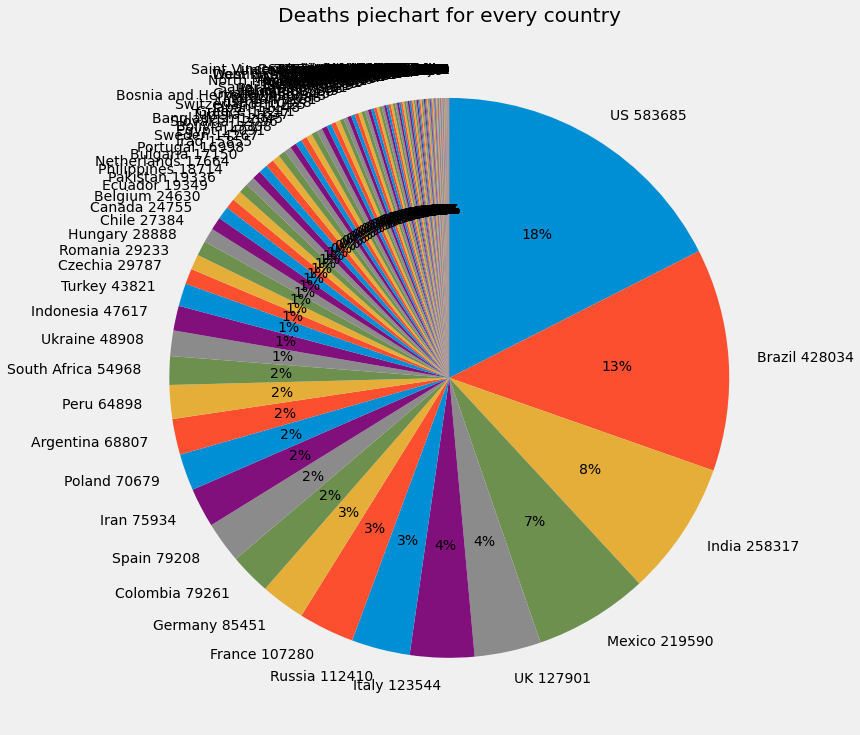

In [35]:
piechart('Deaths')

World total:  12768


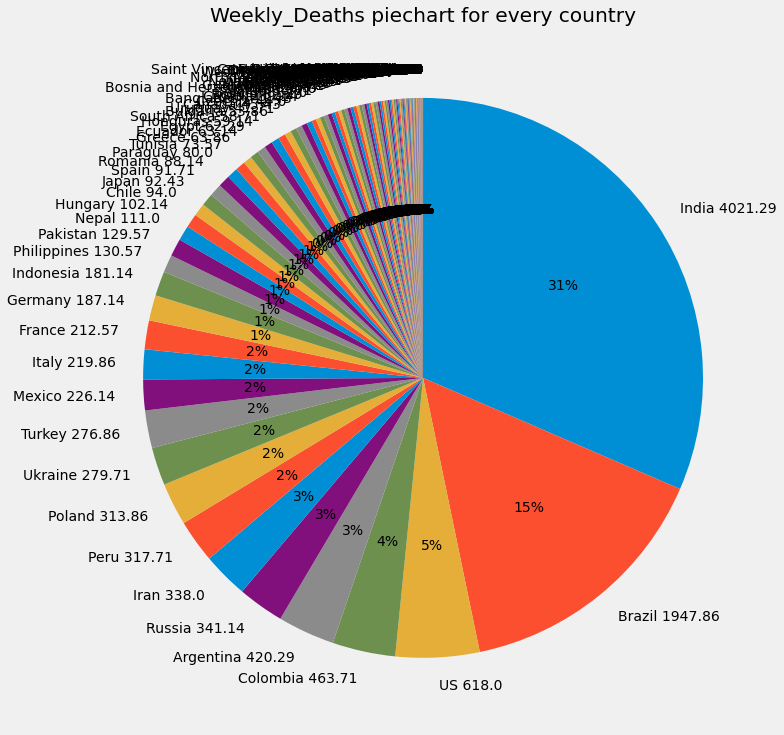

In [36]:
piechart('Weekly_Deaths')

World total:  13934


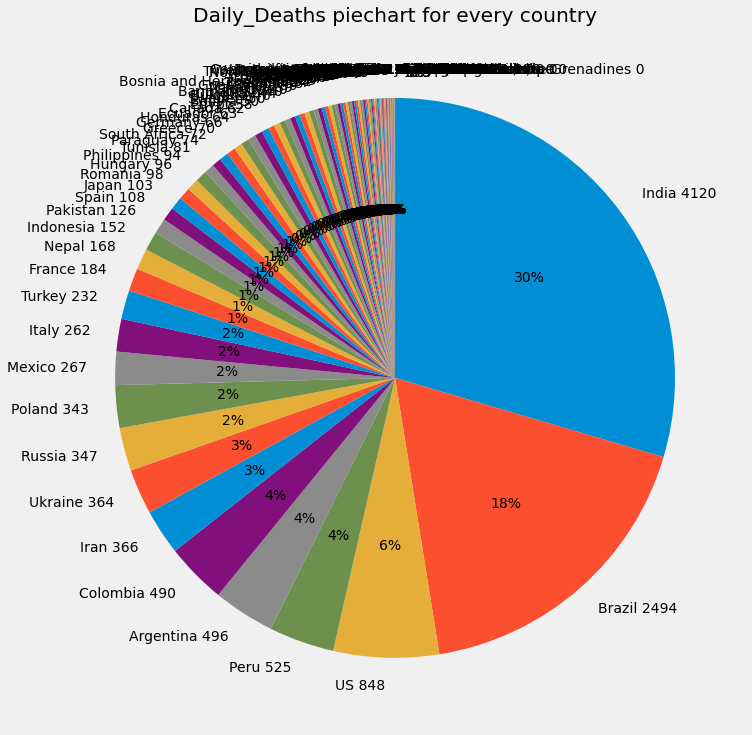

In [37]:
piechart('Daily_Deaths')

In [38]:
print('Today\'s Date: ', dt.datetime.now().date())

Today's Date:  2021-05-13


In [39]:
# Total estimated Cases: 
LastDay_DF.loc['World'].Deaths/mortality

666251800.0

<p>Per Capita deaths are included in this  <a href="https://www.statista.com/statistics/1104709/coronavirus-deaths-worldwide-per-million-inhabitants/" rel="nofollow">Statista</a></p>

In [42]:
!git add .
!git commit -m "`date` update"
!git push origin master

On branch master
Your branch is ahead of 'origin/master' by 1 commit.
  (use "git push" to publish your local commits)

nothing to commit, working tree clean


To https://github.com/Arrowheadahp/COVID-19.git
   8810fa2..7408023  master -> master
